In [1]:
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import os




Greedy_files = [

'cora_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=1_results.p',
'cora_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=1_results.p',
'cora_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=1_results.p']


random_file = ['cora_sampling_method=Random_random_results.p']


In [2]:
def open_files(files):
    file_content = []
    for file in  files:
        try:
            with open(file, 'rb') as f:
                file_content.append(pk.load(f, encoding='latin1'))
        except Exception as e:
            print(e)
            print("No " + file)
    return file_content

geedy_results_partitions = []
for i in range(4):
    partition_file = ["Partition_"+str(i)+"_"+file for file in Greedy_files]
    geedy_results_partitions.append(open_files(partition_file))

random_results_partitions = []
for i in range(4):
    partition_file = ["Partition_"+str(i)+"_"+file for file in random_file]
    random_results_partitions.append(open_files(partition_file))
#random_results = open_files(random_file)



In [11]:
def results_to_lines(results):
    lines = []
    for result in results:
        line = result['results']
        x = []
        y = []
        var = []
        for point in line:
            x.append(point[1])
            y.append(point[2])
            var.append(point[3])
        lines.append((x,y,var,result['info']))
    return lines


w = 2
plt.rcParams.update({'font.size': 14})
def plot(title, save_file,lines, label_name = None):
    plt.errorbar(random_ref_line[0],random_ref_line[1],yerr=random_ref_line[2],alpha = 0.7,color = 'k',label="Random sampling",fmt='-',linewidth=w)
    for line in lines:
        if label_name is not None:
            plt.errorbar(line[0],line[1],yerr=line[2],alpha = 0.5,label=label_name+":"+str(line[3][label_name]),fmt='-',linewidth=w)
        else:
            plt.errorbar(line[0],line[1],yerr=line[2],alpha = 0.5,fmt='-',linewidth=w)
    
    
    plt.xlabel('known labels of training set %')
    plt.ylabel('test accuracy')
   # plt.title(title)
    plt.legend(loc=4, prop={'size': 13})
    plt.grid(True)
    plt.savefig(os.path.join('../../report',save_file), bbox_inches="tight", dpi = 300)



In [12]:

result_0 = results_to_lines(random_results_partitions[0])
#print(result_0[0])
result_1 = results_to_lines(random_results_partitions[1])
result_2 = results_to_lines(random_results_partitions[2])
result_3 = results_to_lines(random_results_partitions[3])

all_te = np.array([result_0[0][1],result_1[0][1],result_2[0][1],result_3[0][1]])
avg = np.mean(all_te, axis=0)
std = np.std(all_te, axis=0)

random_ref_line = (result_0[0][0], list(avg),list(std),result_0[0][3])
#print(random_ref_line)

In [13]:
#plot("EDS sampling","EDS_sampling_K_100.jpg",results_to_lines(eds_results)[0:1],'K_sparsity')

In [14]:
#plot("EDS sampling","EDS_sampling_K10.jpg",results_to_lines(eds_results)[1:2],'K_sparsity')

In [15]:
#plot("EDS sampling","EDS_sampling_K5.jpg",results_to_lines(eds_results)[2:3],'K_sparsity')

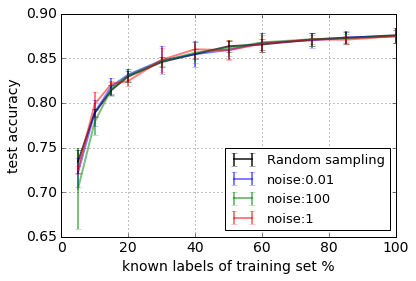

In [16]:

result_0 = results_to_lines(geedy_results_partitions[0])
#print(result_0[0])
result_1 = results_to_lines(geedy_results_partitions[1])
result_2 = results_to_lines(geedy_results_partitions[2])
result_3 = results_to_lines(geedy_results_partitions[3])
greedy_average = []
for i in range(9):
    all_te = np.array([result_0[i][1],result_1[i][1],result_2[i][1],result_3[i][1]])
    avg = np.mean(all_te, axis=0)
    std = np.std(all_te, axis=0)
    greedy_average.append((result_0[i][0], list(avg),list(std),result_0[i][3]))
#print(greedy_average[0])
plot("Greedy sampling, K sparsity = 100 ","Greedy_K100_sampling_partition.png",greedy_average[0:3],'noise')


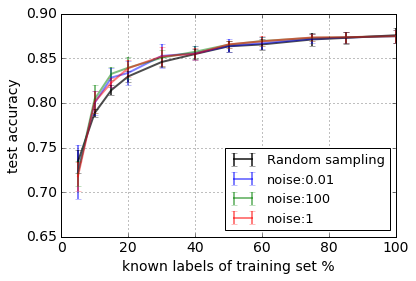

In [36]:
plot("Greedy sampling, K sparsity = 10 ","Greedy_K10_sampling_partition.png",greedy_average[3:6],'noise')


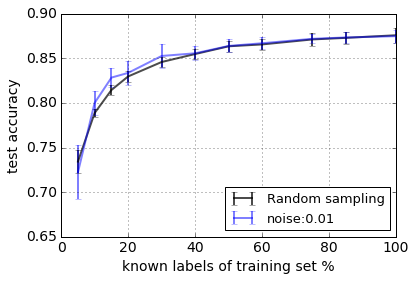

In [18]:
plot("Greedy sampling, K sparsity = 10 ","Greedy_K10_sampling_partition.png",greedy_average[3:4],'noise')


[-1.3205775432288736, 1.5605404786765531, 1.8097459524869963, 0.97175000235438791, 0.47556124627590179, 0.25506746023893356, 0.18677089363337007, 0.37919944152234875, 0.19332475960255335, 0.068264696747055709, -0.099834799766540527]


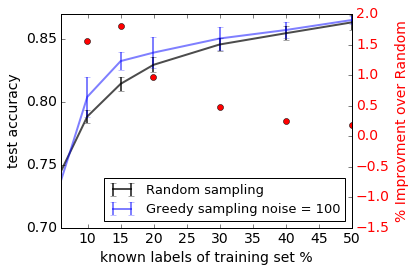

In [74]:
# def plotzoom(title, save_file,lines, label_name = None):
#     plt.errorbar(random_ref_line[0],random_ref_line[1],yerr=random_ref_line[2],alpha = 0.7,color = 'k',label="Random sampling",fmt='-',linewidth=w)
#     for line in lines:
#         if label_name is not None:
#             plt.errorbar(line[0],line[1],yerr=line[2],alpha = 0.5,label=label_name+":"+str(line[3][label_name]),fmt='-',linewidth=w)
#         else:
#             plt.errorbar(line[0],line[1],yerr=line[2],alpha = 0.5,fmt='-',linewidth=w)
    
    
#     plt.xlabel('known labels of training set %')
#     plt.ylabel('test accuracy')
#     plt.axis((5,43,0.7,0.87))
#     plt.legend(loc=4, prop={'size': 13})
#     plt.grid(True)
#     plt.savefig(os.path.join('../../report',save_file), bbox_inches="tight", dpi = 300)


# plotzoom("Greedy sampling, K sparsity = 10 ","Zoom_Greedy_K10_sampling_partition.png",greedy_average[4:5],'noise')
import numpy as np
import matplotlib.pyplot as plt

line = greedy_average[4:5][0]
data2 = list(100*(np.array( np.array(line[1]) - random_ref_line[1])))
print(data2)
fig, ax1 = plt.subplots()

color = 'k'
ax1.set_xlabel('known labels of training set %')
ax1.set_ylabel('test accuracy', color=color)
ax1.errorbar(random_ref_line[0],random_ref_line[1],yerr=random_ref_line[2],alpha = 0.7,color = 'k',label="Random sampling",fmt='-',linewidth=w)
ax1.errorbar(line[0],line[1],yerr=line[2],alpha = 0.5,color = 'b',label="Greedy sampling noise = 100",fmt='-',linewidth=w)
ax1.legend(loc=4, prop={'size': 13})
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax1.axis((6,50,0.7,0.87))
color = 'r'
ax2.set_ylabel('% Improvment over Random', color=color)  # we already handled the x-label with ax1
ax2.plot(line[0], data2,'o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(os.path.join('../../report',"Improv.png"), bbox_inches="tight", dpi = 300)

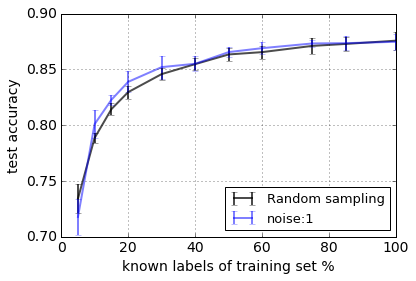

In [20]:
plot("Greedy sampling, K sparsity = 10 ","Greedy_K10_sampling_partition.png",greedy_average[5:6],'noise')


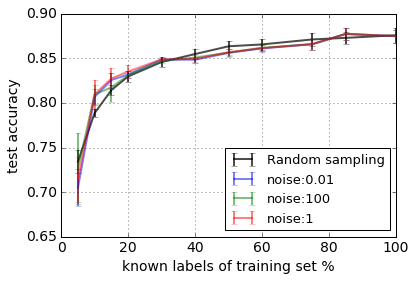

In [21]:
plot("Greedy sampling, K sparsity = 5 ","Greedy_K5_sampling_partition.png",greedy_average[6:9],'noise')

In [101]:
#plot("Max degree sampling,","Max_sampling.jpg",results_to_lines(max_results))